<a href="https://colab.research.google.com/github/ygw365/dl/blob/master/dl02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf  

# 创建一个先入先出队列,初始化队列插入0.1、0.2、0.3三个数字 
q = tf.FIFOQueue(3, "float")  
init = q.enqueue_many(([0.1, 0.2, 0.3],))  

# 定义出队、+1、入队操作
x = q.dequeue()
y = x + 1  
q_inc = q.enqueue([y])  

In [0]:
with tf.Session() as sess:  
  sess.run(init)  
  quelen =  sess.run(q.size())  
  for i in range(2):  
    sess.run(q_inc) # 执行2次操作，队列中的值变为0.3,1.1,1.2

  quelen =  sess.run(q.size())  
  for i in range(quelen):  
    print (sess.run(q.dequeue())) # 输出队列的值

0.3
1.1
1.2


In [0]:
q = tf.RandomShuffleQueue(capacity=10, min_after_dequeue=2, dtypes="float")
sess = tf.Session()
for i in range(0, 10): #10次入队
  sess.run(q.enqueue(i))

for i in range(0, 8): # 8次出队
  print(sess.run(q.dequeue()))

1.0
5.0
4.0
2.0
0.0
6.0
7.0
9.0


In [0]:
for i in range(0, 2): # 8次出队
  print(sess.run(q.dequeue()))

NameError: ignored

In [0]:
sess = tf.Session()
run_options = tf.RunOptions(timeout_in_ms = 10000)    # 等待10秒
try:
  sess.run(q.dequeue(), options=run_options)
except tf.errors.DeadlineExceededError:
  print('out of range')

out of range


In [0]:
a = [i * 7800/10000 for i in [34, 57 ,69, 88, 85, 94, 116]]

In [0]:
a

[26.52, 44.46, 53.82, 68.64, 66.3, 73.32, 90.48]

In [0]:
[round(i/2/3,0) for i in a]

[4.0, 7.0, 9.0, 11.0, 11.0, 12.0, 15.0]

In [0]:
import tflearn

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(227, 227))

100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!


In [0]:
network = input_data(shape=[None, 227, 227, 3])
network = conv_2d(network, 96, 11, strides=4, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = conv_2d(network, 256, 5, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = conv_2d(network, 384, 3, activation='relu')
network = conv_2d(network, 384, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = fully_connected(network, 4096, activation='tanh')
network = dropout(network, 0.5)
network = fully_connected(network, 4096, activation='tanh')
network = dropout(network, 0.5)
network = fully_connected(network, 17, activation='softmax')
network = regression(network, optimizer='momentum',
                   loss='categorical_crossentropy',
                   learning_rate=0.001) # 回归操作，同时规定

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=64)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  


In [0]:
import tensorflow as tf
import numpy as np
# 构造满足一元二次方程的函数
x_data = np.linspace(-1,1,300)[:, np.newaxis] # 为了使点更密一些，我们构建了300个点，分布在-1到1区间，直接采用np生成等差数列的方法，并将结果为300个点的一维数组，转换为300×1的二维数组
noise = np.random.normal(0, 0.05, x_data.shape) # 加入一些噪声点，使它与 x_data 的维度一致，并且拟合为均值为0、方差为0.05的正态分布
y_data = np.square(x_data) - 0.5 + noise # y = x^2 – 0.5 + 噪声


In [0]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [0]:
def add_layer(inputs, in_size, out_size, activation_function=None):
  # 构建权重：in_size×out_size 大小的矩阵
  weights = tf.Variable(tf.random_normal([in_size, out_size])) 
  # 构建偏置：1×out_size 的矩阵
  biases = tf.Variable(tf.zeros([1, out_size]) + 0.1) 
  # 矩阵相乘
  Wx_plus_b = tf.matmul(inputs, weights) + biases 
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
  return outputs # 得到输出数据
# 构建隐藏层，假设隐藏层有20个神经元
h1 = add_layer(xs, 1, 20, activation_function=tf.nn.relu)
# 构建输出层，假设输出层和输入层一样，有1个神经元
prediction = add_layer(h1, 20, 1, activation_function=None)

In [0]:
# 计算预测值和真实值间的误差
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                      reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [0]:
init = tf.global_variables_initializer() # 初始化所有变量
sess = tf.Session()
sess.run(init)

for i in range(1000): # 训练1000次
  sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
  if i % 50 == 0: # 每50次打印出一次损失值
    print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.088658586
0.01300035
0.008485103
0.0063293157
0.005290428
0.0047476417
0.0044106906
0.004134232
0.0038987717
0.0037114099
0.0035564215
0.0034363759
0.0033227487
0.0032306851
0.0031513406
0.0030684695
0.0029956328
0.0029372377
0.0028850033
0.0028348933


In [2]:
import numpy as np

a = np.arange(1, 101)
n_max = int(np.sqrt(len(a)))
is_prime = np.ones(len(a), dtype=bool) # 创建100个元素的数组，用来标记是否为质数
is_prime[0] = False

for i in range(2,n_max):
    if i in a[is_prime]:                  # 跳过非质数
        is_prime[(i**2 - 1)::i] = False # 减 1 是为了修复从 0 开始索引的问题

a[is_prime]

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

In [0]:
b = a[is_prime]

In [11]:
b[0:5:3]

array([2, 7])

In [13]:
import numpy as np

# 假设圆的半径为1，圆心在原点
n_dots = 1000000
x = np.random.random(n_dots)
y = np.random.random(n_dots)                     # 随机产生一百万个点
distance = np.sqrt(x ** 2 + y ** 2)              # 计算每个点到圆心的距离
in_circle = distance[distance < 1]               # 所有落在扇形内的点

pi = 4 * float(len(in_circle)) / n_dots         # 计算出 PI 的值
pi

3.141284

In [0]:
from sklearn import datasets
digits = datasets.load_digits()

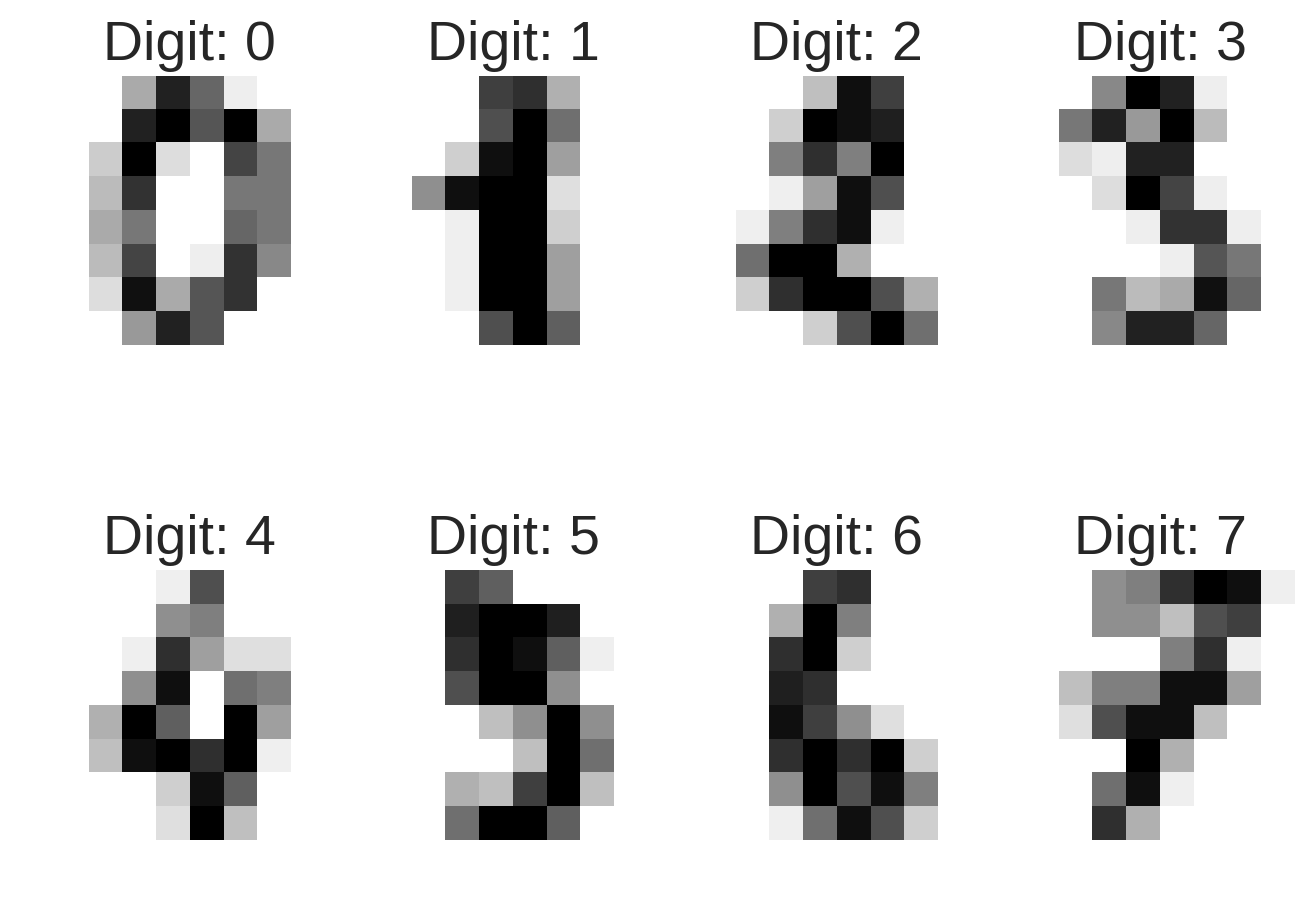

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(8, 6), dpi=200)
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, fontsize=20)